<a href="https://colab.research.google.com/github/fernanda0402/Doutorado/blob/main/Forma_funcional_gamma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Bibliotecas:

import urllib.request
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import sympy as sp
import scipy.interpolate as interp
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm
from scipy.optimize import curve_fit
from scipy.integrate import odeint

In [ ]:
#!pip install -q condacolab
import condacolab
#condacolab.install()
!mamba install pyccl

✨🍰✨ Everything looks OK!

                  __    __    __    __
                 /  \  /  \  /  \  /  \
                /    \/    \/    \/    \
███████████████/  /██/  /██/  /██/  /████████████████████████
              /  / \   / \   / \   / \  \____
             /  /   \_/   \_/   \_/   \    o \__,
            / _/                       \_____/  `
            |/
        ███╗   ███╗ █████╗ ███╗   ███╗██████╗  █████╗
        ████╗ ████║██╔══██╗████╗ ████║██╔══██╗██╔══██╗
        ██╔████╔██║███████║██╔████╔██║██████╔╝███████║
        ██║╚██╔╝██║██╔══██║██║╚██╔╝██║██╔══██╗██╔══██║
        ██║ ╚═╝ ██║██║  ██║██║ ╚═╝ ██║██████╔╝██║  ██║
        ╚═╝     ╚═╝╚═╝  ╚═╝╚═╝     ╚═╝╚═════╝ ╚═╝  ╚═╝

        mamba (1.4.1) supported by @QuantStack

        GitHub:  https://github.com/mamba-org/mamba
        Twitter: https://twitter.com/QuantStack

█████████████████████████████████████████████████████████████


Looking for: ['pyccl']

[+] 0.0s
conda-forge/linux-64  ⣾  
conda-forge/noarch    ⣾  [+] 

In [ ]:
import pyccl as ccl

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install git+https://github.com/JCGoran/GaPP@feature/python3#GaPP
from gapp import gp
from numpy import loadtxt, savetxt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/JCGoran/GaPP (to revision feature/python3) to /tmp/pip-req-build-7h29i_mx
  Running command git clone --filter=blob:none --quiet https://github.com/JCGoran/GaPP /tmp/pip-req-build-7h29i_mx
  Running command git checkout -b feature/python3 --track origin/feature/python3
  Switched to a new branch 'feature/python3'
  Branch 'feature/python3' set up to track remote branch 'feature/python3' from 'origin'.
  Resolved https://github.com/JCGoran/GaPP to commit 931e4d0e0eb861b01c315e960f74b31a9996aa6f
  Preparing metadata (setup.py) ... done



Optimized hyperparameters:
theta = [0.6962485  2.43808246]

Optimized hyperparameters:
theta = [0.6962342  2.43801101]


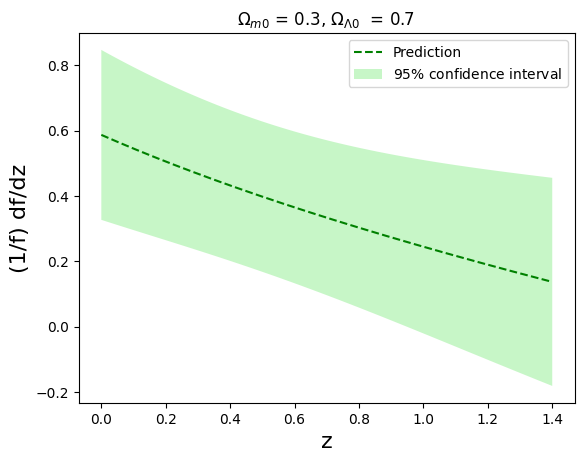

In [ ]:
# RECONSTRUÇÃO DE f

# baixando os dados
data = np.genfromtxt('/content/drive/MyDrive/Doutorado/fz_data.csv', delimiter=', ')

z_gapp = data[:, 0]

f_gapp = data[:, 1]

sig_f = data[:, 2]

# nomeando
x_gapp = z_gapp
y_gapp = f_gapp
e = sig_f

# xmin, xmax and nstar are interpreted as two-dimensional vectors
xmin = 0
xmax = 1.4
nstar = 1000

# initial values of the hyperparameters of the squared-exponential covariance function
initheta = [2.0, 2.0]

# initialization of the Gaussian Process
g = gp.GaussianProcess(x_gapp, y_gapp, e, cXstar=(xmin, xmax, nstar))

# training of the hyperparameters and reconstruction of the function
(rec, theta) = g.gp(theta=initheta)

xi = rec[:, 0]

y_pred = rec[:, 1]
sigma  = rec[:, 2]

y_pred_95_less = y_pred - 1.9600*sigma
y_pred_95_plus = y_pred + 1.9600*sigma



# PRIMEIRA DERIVADA DE f

from gapp import dgp # dgp calcula a primeira, segunda e terceira derivada

# baixando os dados
data = np.genfromtxt('/content/drive/MyDrive/Doutorado/fz_data.csv', delimiter=', ')

z_gapp = data[:, 0]

f_gapp = data[:, 1]

sig_f = data[:, 2]

# nomeando
x_gapp = z_gapp
y_gapp = f_gapp
e = sig_f

xmin = 0
xmax = 1.4
nstar = 1000

# initial values of the hyperparameters
initheta = [2.0, 2.0]

# initialization of the Gaussian Process
g = dgp.DGaussianProcess(x_gapp, y_gapp, e, cXstar=(xmin, xmax, nstar))

# training of the hyperparameters and reconstruction of the function
(drec, theta) = g.dgp(thetatrain=initheta)

# the second and third derivatives use g.d2gp() and g.d3gp()

xi     = drec[:, 0]
y_pred = drec[:, 1]
sigma  = drec[:, 2]

y_pred_95_less = y_pred - 1.9600*sigma
y_pred_95_plus = y_pred + 1.9600*sigma


# FAZENDO f'/f
# baixando e nomeando dados
fz = np.genfromtxt('/content/drive/MyDrive/Doutorado/fz_recon.dat', delimiter='\t')

z_dgapp = fz[:, 0]
f_dgapp = fz[:, 1]

ef = fz[:, 2]

dfz = np.genfromtxt('/content/drive/MyDrive/Doutorado/dfz_recon.dat', delimiter='\t')

df = dfz[:, 1]

edf = dfz[:, 2]

df_f = df / f_dgapp

sigma_ff = np.sqrt(((df_f) ** 2) * (((ef / f_dgapp) ** 2) + ((edf / df) ** 2)))


# PLOTE
plt.plot(z_dgapp, df_f, color='green', label='Prediction', linestyle="--")
plt.fill(np.concatenate([z_dgapp, z_dgapp[::-1]]),
         np.concatenate([df_f - 1.9600 * sigma,
                        (df_f + 1.9600 * sigma)[::-1]]),
         alpha=.5, fc='lightgreen', ec='None', label='$95\%$ confidence interval')

# legenda, label e título
plt.title('$\Omega_{m0}$ = 0.3, $\Omega_{\Lambda 0}$  = 0.7 ')
plt.xlabel('z', fontsize=16)
plt.ylabel('(1/f) df/dz', fontsize=16)
plt.legend(loc='best')
plt.show()

H = xi, y_pred, sigma_ff
np.savetxt('df_f_recon_1.dat', np.transpose(H), delimiter='\t')
#from google.colab import files
#files.download("df_f_recon_1.dat")


Optimized hyperparameters:
theta = [134.94426242   1.98775665]

Optimized hyperparameters:
theta = [134.94426242   1.98775665]


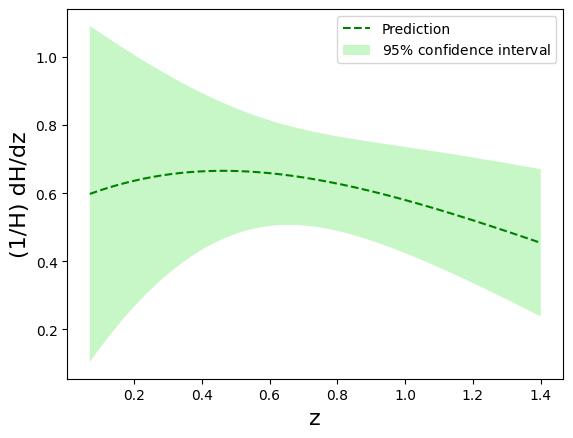

In [ ]:
# RECONSTRUINDO H

# baixando os dados
data_h = np.genfromtxt('/content/drive/MyDrive/Doutorado/CC_Hz_data.csv', delimiter=', ')

z_h = data_h[:, 0]

h = data_h[:, 1]

sig_h = data_h[:, 2]

# nomeando
x_h = z_h
y_h = h
e = sig_h

# xmin, xmax and nstar are interpreted as two-dimensional vectors
xmin = 0
xmax = 1.4
nstar = 1000

# initial values of the hyperparameters of the squared-exponential covariance function
initheta = [2.0, 2.0]

# initialization of the Gaussian Process
g = gp.GaussianProcess(x_h, y_h, e, cXstar=(xmin, xmax, nstar))

# training of the hyperparameters and reconstruction of the function
(rec, theta) = g.gp(theta=initheta)

xi = rec[:, 0]

y_pred = rec[:, 1]
sigma  = rec[:, 2]

y_pred_95_less = y_pred - 1.9600*sigma
y_pred_95_plus = y_pred + 1.9600*sigma



# PRIMEIRA DERIVADA DE H
from gapp import dgp # dgp calcula a primeira, segunda e terceira derivada

# baixando os dados reconstruídos de H
data_h = np.genfromtxt('/content/drive/MyDrive/Doutorado/CC_Hz_data.csv', delimiter=', ')

z_h = data_h[:, 0]

h = data_h[:, 1]

sig_h = data_h[:, 2]

# nomeando
x_h = z_h
y_h = h
e = sig_h

# xmin, xmax and nstar are interpreted as two-dimensional vectors
xmin = 0
xmax = 1.4
nstar = 1000

# initial values of the hyperparameters of the squared-exponential covariance function
initheta = [2.0, 2.0]

# initialization of the Gaussian Process
g = dgp.DGaussianProcess(x_h, y_h, e, cXstar=(xmin, xmax, nstar))

# training of the hyperparameters and reconstruction of the function
(drec, theta) = g.dgp(theta=initheta)

# the second and third derivatives use g.d2gp() and g.d3gp()

xi     = drec[:, 0]
y_pred = drec[:, 1]
sigma  = drec[:, 2]

y_pred_95_less = y_pred - 1.9600*sigma
y_pred_95_plus = y_pred + 1.9600*sigma



# FAZENDO H'/H
# baixando e nomeando dados reconstruídos de H
hz = np.genfromtxt('/content/drive/MyDrive/Doutorado/hz_recon.dat', delimiter='\t')

z_hz = hz[:, 0]
h_hz = hz[:, 1]

ehz = hz[:, 2]

# baixando e nomeando dados reconstruídos da derivada de H
dhz = np.genfromtxt('/content/drive/MyDrive/Doutorado/dhz_recon_newz.dat', delimiter='\t')

z_dhz = dhz[:, 0]

dh = dhz[:, 1]

edh = dhz[:, 2]

dh_h = dh / h_hz  # H'/H

sigma_H = np.sqrt(((dh_h) ** 2) * (((ehz / h_hz) ** 2) + ((edh / dh) ** 2)))


# PLOTE
plt.plot(z_dhz, dh_h, color='green', label='Prediction', linestyle="--")
plt.fill(np.concatenate([z_dhz, z_dhz[::-1]]),
         np.concatenate([dh_h - 1.9600 * sigma_H,
                        (dh_h + 1.9600 * sigma_H)[::-1]]),
         alpha=.5, fc='lightgreen', ec='None', label='$95\%$ confidence interval')

# legenda, label e título
plt.xlabel('z', fontsize=16)
plt.ylabel('(1/H) dH/dz', fontsize=16)
plt.legend(loc='best')
plt.show()

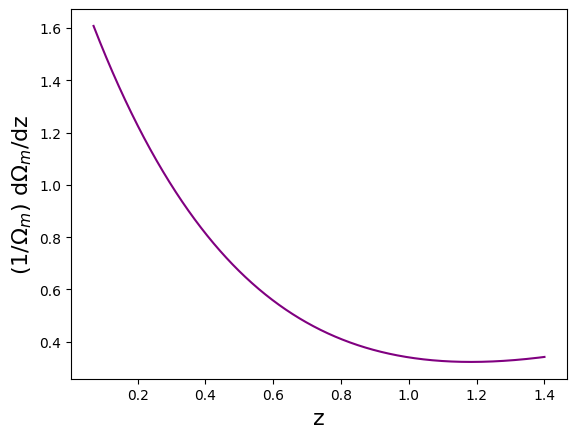

In [ ]:
# definindo Om'/Om

dOm_Om = (3/(1+z_dhz)) - (2*dh_h)   #dh_h vem da reconstrução dos dados

eOm = np.sqrt( (2*sigma_H)**2 )

plt.plot(z_dhz, dOm_Om, color='purple')

# legenda, label e título
plt.xlabel('z', fontsize=16)
plt.ylabel('(1/$\Omega_m$) d$\Omega_m$/dz', fontsize=16)
plt.show()

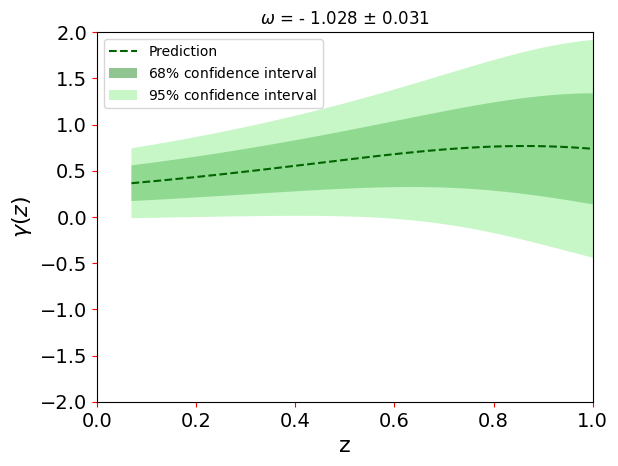

In [ ]:
# gamma prediction

gamma_pred = df_f / dOm_Om

sigma_g = np.sqrt( (sigma_ff / dOm_Om )**2 + ( ( (df_f*eOm)/ ((dOm_Om)**2) ) )**2)


# PLOTE

fig, ax = plt.subplots()
plt.ylim(-2,2)
plt.xlim(0,1.0)
plt.tick_params(labelsize=14, color='red')
plt.plot(z_dhz, gamma_pred, color='darkgreen', label='Prediction', linestyle="--")
plt.fill(np.concatenate([z_dhz, z_dhz[::-1]]),
         np.concatenate([gamma_pred - 1.0000 * sigma_g,
                        (gamma_pred + 1.0000 * sigma_g)[::-1]]),
         alpha=.5, fc='forestgreen', ec='None', label='$68\%$ confidence interval')
plt.fill(np.concatenate([z_dhz, z_dhz[::-1]]),
         np.concatenate([gamma_pred - 1.9600 * sigma_g,
                        (gamma_pred + 1.9600 * sigma_g)[::-1]]),
         alpha=.5, fc='lightgreen', ec='None', label='$95\%$ confidence interval')

# legenda, label e título
plt.xlabel('z', fontsize=16)
plt.ylabel('$\gamma(z)$', fontsize=16)
plt.legend(loc='best')
plt.title('$\omega$ = - 1.028 $\pm$ 0.031')
plt.show()

Exemplo usando odeint para resolver EDO's retirada do livro Python for Computational Science and Engineering (p.146).

$\frac{dy(t)}{dt} = - 2 y t$

sendo $y(0) = 1$.

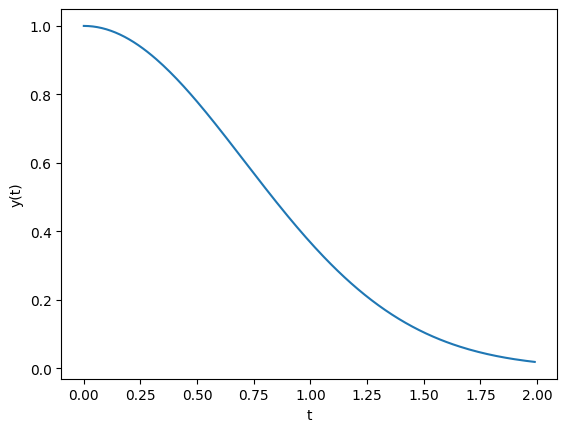

In [ ]:
def f(y, t):
    return -2 * y * t


y0 = 1     # initial value
a = 0      # integration limits for t
b = 2

t = np.arange(a, b, 0.01)    # values of t for which we require the solution y ( t )
y = odeint(f, y0, t)        # actual computation of y ( t )

# plotting of results
plt.plot(t , y )
plt.xlabel('t')
plt.ylabel('y(t)')
plt.show()

A partir de agora, vamos buscar resolver a seguinte equação:

$\gamma '$ $ln \left[ \frac{\Omega_{m0} (1+z)^3}{\Omega_{m0} (1+z)^3 + 1 - \Omega_{m0}} \right]$ + $\gamma$ $\left[\frac{3}{1+z} - \frac{2H'}{H} \right]$ - $\frac{f'}{f}$ = 0.

Podemos reescrever a equação acima como:

A(z) $\gamma '$ + B(z) $\gamma$ - C(z) = 0.

In [107]:
def indice(t, y):    # z é o redshift e y é o gamma
  G_g = y[0]  # gamma

  Om0 = 0.315
  A = np.log( (Om0*((1+t)**3) )/ ( Om0*((1+t)**3) + 1 - Om0 ) )
  B = dOm_Om
  C = df_f

  dG_g = - (B/A)*G_g + (C/A)
  return dG_g

# Espaço de integração:
t_span = [0, 1.4]   # intervalo de integração do redshift
t = np.linspace(0, 1.4, 1000)

# Condições iniciais:
y0 = [0]

# Solução:
sol = solve_ivp(indice, t_span, y0, t_eval=t, method='LSODA') # função que quero resolver, o intervalo de integração, as condições iniciais, o linspace e o método
G_g = sol.y[0]

ValueError: ignored